<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%205.2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install scikit-fuzzy

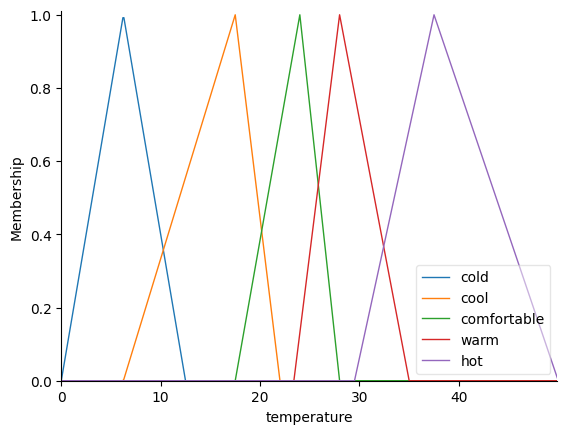

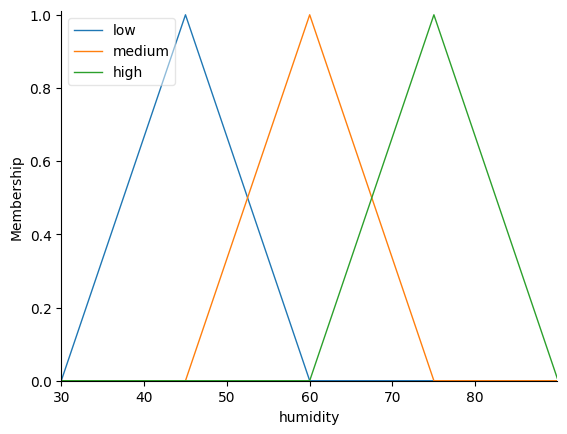

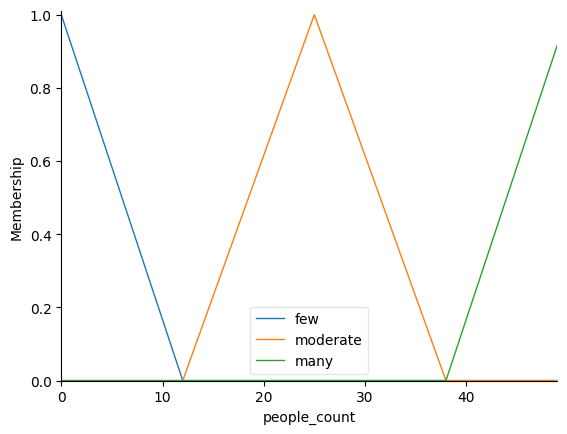

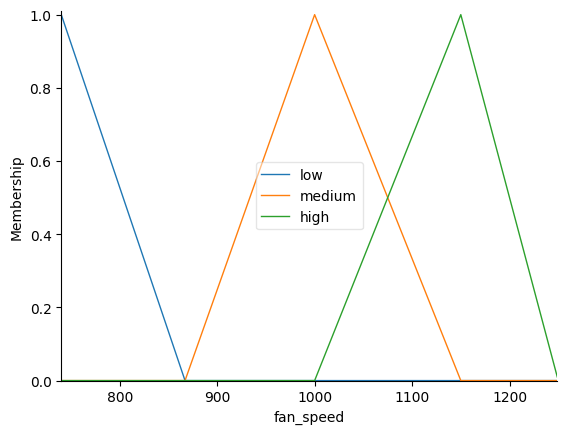

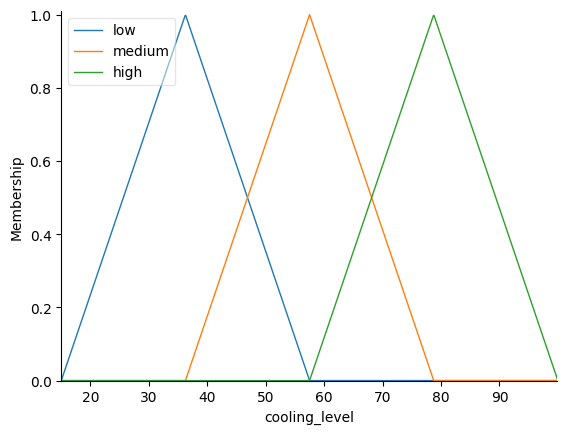

In [12]:
#exam 4

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature=ctrl.Antecedent(np.arange(0,50,0.1),'temperature')
humidity_level=ctrl.Antecedent(np.arange(30,90,0.1),'humidity')
people_count=ctrl.Antecedent(np.arange(0,50,1),'people_count')
fan_speed=ctrl.Consequent(np.arange(740,1250,1),'fan_speed')
cooling_level=ctrl.Consequent(np.arange(15,100,0.1),'cooling_level')


temperature['cold']=fuzz.trimf(temperature.universe,[0,6.25,12.5])
temperature['cool']=fuzz.trimf(temperature.universe,[6.25,17.5,22])
temperature['comfortable']=fuzz.trimf(temperature.universe,[17.5,24,28])
temperature['warm']=fuzz.trimf(temperature.universe,[23.4,28,35])
temperature['hot']=fuzz.trimf(temperature.universe,[29.5,37.5,50])
humidity_level['low']=fuzz.trimf(humidity_level.universe,[30,45,60])
humidity_level['medium']=fuzz.trimf(humidity_level.universe,[45,60,75])
humidity_level['high']=fuzz.trimf(humidity_level.universe,[60,75,90])
people_count['few']=fuzz.trimf(people_count.universe,[0,0,12])
people_count['moderate']=fuzz.trimf(people_count.universe,[12,25,38])
people_count['many']=fuzz.trimf(people_count.universe,[38,50,50])
fan_speed['low']=fuzz.trimf(fan_speed.universe,[740,740,867])
fan_speed['medium']=fuzz.trimf(fan_speed.universe,[867,1000,1150])
fan_speed['high']=fuzz.trimf(fan_speed.universe,[1000,1150,1250])
cooling_level['low']=fuzz.trimf(cooling_level.universe,[15,36.25,57.5])
cooling_level['medium']=fuzz.trimf(cooling_level.universe,[36.25,57.5,78.75])
cooling_level['high']=fuzz.trimf(cooling_level.universe,[57.5,78.75,100])


temperature.view()
humidity_level.view()
people_count.view()
fan_speed.view()
cooling_level.view()





78.74976506556351
1017.4763656080937


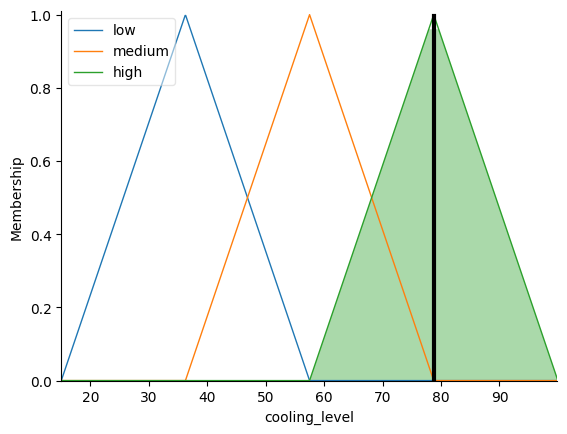

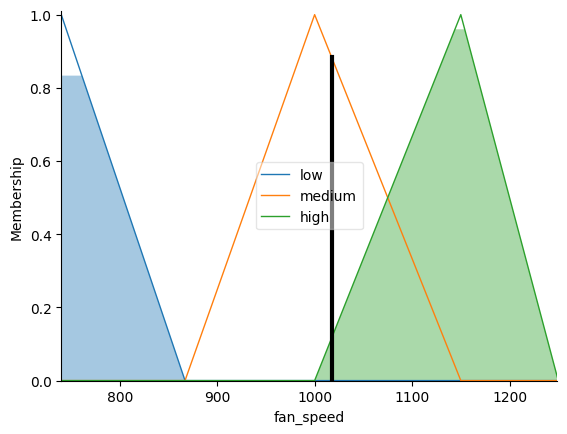

In [13]:
rule1=ctrl.Rule(temperature['cold'],fan_speed['low'])
rule2=ctrl.Rule(temperature['cool'],fan_speed['low'])
rule3=ctrl.Rule(temperature['comfortable'],fan_speed['medium'])
rule4=ctrl.Rule(temperature['warm'],fan_speed['high'])
rule5=ctrl.Rule(temperature['hot'],fan_speed['high'])
rule6=ctrl.Rule(temperature['cold'],cooling_level['low'])
rule7=ctrl.Rule(temperature['cool'],cooling_level['low'])
rule8=ctrl.Rule(temperature['comfortable'],cooling_level['medium'])
rule9=ctrl.Rule(temperature['warm'],cooling_level['high'])
rule10=ctrl.Rule(temperature['hot'],cooling_level['high'])
rule11=ctrl.Rule(humidity_level['medium'],cooling_level['medium'])
rule12=ctrl.Rule(humidity_level['high'],cooling_level['high'])
rule13=ctrl.Rule(people_count['few'],fan_speed['low'])
rule14=ctrl.Rule(people_count['moderate'],fan_speed['medium'])
rule15=ctrl.Rule(people_count['many'],fan_speed['high'])
rule16=ctrl.Rule(temperature['hot']&humidity_level['high']&people_count['many'],(cooling_level['high'],fan_speed['high']))
rule17=ctrl.Rule(temperature['comfortable']&humidity_level['medium']&people_count['moderate'],(cooling_level['medium'],fan_speed['medium']))
rule18=ctrl.Rule(temperature['cool']&humidity_level['low']&people_count['few'],(cooling_level['low'],fan_speed['low']))




cooling_level_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
cooling=ctrl.ControlSystemSimulation(cooling_level_ctrl)
cooling.input['temperature']=38
cooling.input['humidity']=85
cooling.input['people_count']=2
cooling.compute()
print(cooling.output['cooling_level'])
print(cooling.output['fan_speed'])
cooling_level.view(sim=cooling)
fan_speed.view(sim=cooling)